In [1]:
# CML3014N Machine Learning Assignment 2
# Data Source:
#     1. Student Performance https://archive.ics.uci.edu/dataset/320/student+performance
#     2. Wine Quality https://archive.ics.uci.edu/dataset/186/wine+quality

# Dataset Description:
#    1. Student Performance mixed dataset with both numerical and categorical data
#       G1, G2, G3 - numerical from 0 to 20 (the target variable. G3 is the final grade)
#    2. Wine Quality dataset with numerical continuous
#       quality - score between 0 and 10 (the target variable)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [2]:
# Step 1: Load the dataset
wineRed_df = pd.read_csv('data/winequality-red.csv', delimiter=';')
wineWhite_df = pd.read_csv('data/winequality-white.csv', delimiter=';')
stdMath_df = pd.read_csv('data/student-mat.csv', delimiter=';')
stdPor_df = pd.read_csv('data/student-por.csv', delimiter=';')

# Display the first few rows of the dataset
print("Wine Red Dataset")
print("Total number of columns: ", wineRed_df.shape[1], "Total number of rows: ", wineRed_df.shape[0])
display(wineRed_df.head())

print("Wine White Dataset")
print("Total number of columns: ", wineWhite_df.shape[1], "Total number of rows: ", wineWhite_df.shape[0])
display(wineWhite_df.head())

print("Student Math Dataset")
print("Total number of columns: ", stdMath_df.shape[1], "Total number of rows: ", stdMath_df.shape[0])
display(stdMath_df.head())

print("Student Portuguese Dataset")
print("Total number of columns: ", stdPor_df.shape[1], "Total number of rows: ", stdPor_df.shape[0])
display(stdPor_df.head())

Wine Red Dataset
Total number of columns:  12 Total number of rows:  1599


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Wine White Dataset
Total number of columns:  12 Total number of rows:  4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Student Math Dataset
Total number of columns:  33 Total number of rows:  395


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Student Portuguese Dataset
Total number of columns:  33 Total number of rows:  649


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
# Step 2: Preprocess the dataset
# * The model is MLP, only handle numerical data.
# * Wine data has only numerical data, each feature is in different scale, thus need to normalize the data.
# * Student data has both numerical and categorical data, need to handle categorical data with string indexer and one-hot encoding.

# Step 2.1 Preprocess the wine dataset
# Prepare both normalized and standardized dataset
scaler = MinMaxScaler()
wineRed_df_norm = pd.DataFrame(scaler.fit_transform(wineRed_df), columns=wineRed_df.columns)
wineWhite_df_norm = pd.DataFrame(scaler.fit_transform(wineWhite_df), columns=wineWhite_df.columns)

scaler = StandardScaler()
wineRed_df_std = pd.DataFrame(scaler.fit_transform(wineRed_df), columns=wineRed_df.columns)
wineWhite_df_std = pd.DataFrame(scaler.fit_transform(wineWhite_df), columns=wineWhite_df.columns)

print("Wine Red Dataset Normalized")
print("Total number of columns: ", wineRed_df_norm.shape[1], "Total number of rows: ", wineRed_df_norm.shape[0])
display(wineRed_df_norm.head())
print("Wine Red Dataset Standardized")
print("Total number of columns: ", wineRed_df_std.shape[1], "Total number of rows: ", wineRed_df_std.shape[0])
display(wineRed_df_std.head())

print("Wine White Dataset Normalized")
print("Total number of columns: ", wineWhite_df_norm.shape[1], "Total number of rows: ", wineWhite_df_norm.shape[0])
display(wineWhite_df_norm.head())
print("Wine White Dataset Standardized")
print("Total number of columns: ", wineWhite_df_std.shape[1], "Total number of rows: ", wineWhite_df_std.shape[0])
display(wineWhite_df_std.head())

# Step 2.2 Preprocess the student dataset
# Handle categorical data using label encoder
# Column to process School, sex, address, famsize, pstatus, medu, fedu, mjob, fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic

# First encode the categorical data
labelEncoder = LabelEncoder()
stdMath_df_encoded = stdMath_df.copy()
stdPor_df_encoded = stdPor_df.copy()
for column in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    stdMath_df_encoded[column] = labelEncoder.fit_transform(stdMath_df[column])
    stdPor_df_encoded[column] = labelEncoder.fit_transform(stdPor_df[column])

# Second normalize and standardize the dataset
scaler = MinMaxScaler()
stdMath_df_norm = pd.DataFrame(scaler.fit_transform(stdMath_df_encoded), columns=stdMath_df_encoded.columns)
stdPor_df_norm = pd.DataFrame(scaler.fit_transform(stdPor_df_encoded), columns=stdPor_df_encoded.columns)

scaler = StandardScaler()
stdMath_df_std = pd.DataFrame(scaler.fit_transform(stdMath_df_encoded), columns=stdMath_df_encoded.columns)
stdPor_df_std = pd.DataFrame(scaler.fit_transform(stdPor_df_encoded), columns=stdPor_df_encoded.columns)

print("Student Math Dataset Normalized")
print("Total number of columns: ", stdMath_df_norm.shape[1], "Total number of rows: ", stdMath_df_norm.shape[0])
display(stdMath_df_norm.head())
print("Student Math Dataset Standardized")
print("Total number of columns: ", stdMath_df_std.shape[1], "Total number of rows: ", stdMath_df_std.shape[0])
display(stdMath_df_std.head())


print("Student Portuguese Dataset Normalized")
print("Total number of columns: ", stdPor_df_norm.shape[1], "Total number of rows: ", stdPor_df_norm.shape[0])
display(stdPor_df_norm.head())
print("Student Portuguese Dataset Standardized")
print("Total number of columns: ", stdPor_df_std.shape[1], "Total number of rows: ", stdPor_df_std.shape[0])
display(stdPor_df_std.head())

Wine Red Dataset Normalized
Total number of columns:  12 Total number of rows:  1599


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


Wine Red Dataset Standardized
Total number of columns:  12 Total number of rows:  1599


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


Wine White Dataset Normalized
Total number of columns:  12 Total number of rows:  4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5


Wine White Dataset Standardized
Total number of columns:  12 Total number of rows:  4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787


Student Math Dataset Normalized
Total number of columns:  33 Total number of rows:  395


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,0.428571,1.0,0.0,0.0,1.00,1.00,0.00,1.00,...,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,0.1250,0.315789,0.30
1,0.0,0.0,0.285714,1.0,0.0,1.0,0.25,0.25,0.00,0.50,...,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,0.1250,0.263158,0.30
2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.00,0.50,...,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,0.2500,0.421053,0.50
3,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.25,0.75,...,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,0.7500,0.736842,0.75
4,0.0,0.0,0.142857,1.0,0.0,1.0,0.75,0.75,0.50,0.50,...,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,0.1875,0.526316,0.50


Student Math Dataset Standardized
Total number of columns:  33 Total number of rows:  395


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,-0.36305,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,-1.769793,1.993149,...,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791,-0.964934
1,-0.36305,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979,-0.964934
2,-0.36305,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415,-0.090739
3,-0.36305,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.954077,0.833659,...,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,1.002004
4,-0.36305,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.138362,-0.325831,...,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038,-0.090739


Student Portuguese Dataset Normalized
Total number of columns:  33 Total number of rows:  649


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,0.428571,1.0,0.0,0.0,1.00,1.00,0.00,1.00,...,0.75,0.50,0.75,0.00,0.00,0.5,0.1250,0.000000,0.578947,0.578947
1,0.0,0.0,0.285714,1.0,0.0,1.0,0.25,0.25,0.00,0.50,...,1.00,0.50,0.50,0.00,0.00,0.5,0.0625,0.473684,0.578947,0.578947
2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.00,0.50,...,0.75,0.50,0.25,0.25,0.50,0.5,0.1875,0.631579,0.684211,0.631579
3,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.25,0.75,...,0.50,0.25,0.25,0.00,0.00,1.0,0.0000,0.736842,0.736842,0.736842
4,0.0,0.0,0.142857,1.0,0.0,1.0,0.75,0.75,0.50,0.50,...,0.75,0.50,0.25,0.00,0.25,1.0,0.0000,0.578947,0.684211,0.684211


Student Portuguese Dataset Standardized
Total number of columns:  33 Total number of rows:  649


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,-0.730944,-0.833377,1.031695,0.660182,-0.648175,-2.666927,1.310216,1.540715,-1.556453,2.057248,...,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-4.155470,-0.195820,-0.280658
1,-0.730944,-0.833377,0.210137,0.660182,-0.648175,0.374963,-1.336039,-1.188832,-1.556453,-0.260728,...,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.874570,-0.195820,-0.280658
2,-0.730944,-0.833377,-1.432980,0.660182,1.542792,0.374963,-1.336039,-1.188832,-1.556453,-0.260728,...,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.219064,0.491137,0.029116
3,-0.730944,-0.833377,-1.432980,0.660182,-0.648175,0.374963,1.310216,-0.278983,-0.754756,0.898260,...,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,0.948153,0.834615,0.648663
4,-0.730944,-0.833377,-0.611422,0.660182,-0.648175,0.374963,0.428131,0.630866,0.046941,-0.260728,...,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.789159,-0.145481,0.491137,0.338889


In [4]:
# Step 3: Split the dataset into training and testing
# * Use 80% of the data for training and 20% for testing
# * For each dataset, split into input features and target
# * For wine dataset, the target is quality
# * For student dataset, the target is G3

# Step 3.1 Split the wine dataset with train_test_split, x is features, y is target
wineRed_x_norm = wineRed_df_norm.drop(columns=['quality'])
wineRed_y_norm = wineRed_df_norm['quality']  # Target variable
wineRed_x_train_norm, wineRed_x_test_norm, wineRed_y_train_norm, wineRed_y_test_norm = train_test_split(wineRed_x_norm, wineRed_y_norm, test_size=0.2, random_state=42)

wineRed_x_std = wineRed_df_std.drop(columns=['quality'])
wineRed_y_std = wineRed_df_std['quality']  # Target variable
wineRed_x_train_std, wineRed_x_test_std, wineRed_y_train_std, wineRed_y_test_std = train_test_split(wineRed_x_std, wineRed_y_std, test_size=0.2, random_state=42)

wineWhite_x_norm = wineWhite_df_norm.drop(columns=['quality'])
wineWhite_y_norm = wineWhite_df_norm['quality']  # Target variable
wineWhite_x_train_norm, wineWhite_x_test_norm, wineWhite_y_train_norm, wineWhite_y_test_norm = train_test_split(wineWhite_x_norm, wineWhite_y_norm, test_size=0.2, random_state=42)

wineWhite_x_std = wineWhite_df_std.drop(columns=['quality'])
wineWhite_y_std = wineWhite_df_std['quality']  # Target variable
wineWhite_x_train_std, wineWhite_x_test_std, wineWhite_y_train_std, wineWhite_y_test_std = train_test_split(wineWhite_x_std, wineWhite_y_std, test_size=0.2, random_state=42)

# Step 3.2 Split the student dataset with train_test_split, x is features, y is target
stdMath_x_norm = stdMath_df_norm.drop(columns=['G3'])
stdMath_y_norm = stdMath_df_norm['G3']  # Target variable
stdMath_x_train_norm, stdMath_x_test_norm, stdMath_y_train_norm, stdMath_y_test_norm = train_test_split(stdMath_x_norm, stdMath_y_norm, test_size=0.2, random_state=42)

stdPor_x_norm = stdPor_df_norm.drop(columns=['G3'])
stdPor_y_norm = stdPor_df_norm['G3']  # Target variable
stdPor_x_train_norm, stdPor_x_test_norm, stdPor_y_train_norm, stdPor_y_test_norm = train_test_split(stdPor_x_norm, stdPor_y_norm, test_size=0.2, random_state=42)

stdMath_x_std = stdMath_df_std.drop(columns=['G3'])
stdMath_y_std = stdMath_df_norm['G3']  # Target variable
stdMath_x_train_std, stdMath_x_test_std, stdMath_y_train_std, stdMath_y_test_std = train_test_split(stdMath_x_std, stdMath_y_std, test_size=0.2, random_state=42)

stdPor_x_std = stdPor_df_std.drop(columns=['G3'])
stdPor_y_std = stdPor_df_std['G3']  # Target variable
stdPor_x_train_std, stdPor_x_test_std, stdPor_y_train_std, stdPor_y_test_std = train_test_split(stdPor_x_std, stdPor_y_std, test_size=0.2, random_state=42)

In [5]:
# Step 4: Build , Train, Evaluate the model
# * Both dataset target are continuous, use MLPRegressor
# * Evaluate the model with error based metrics (MAE, MSE, RMSE, R2)
# * Plot the training history
# * Plot the prediction vs actual target


# A function to train and evaluate the model
def train_and_evaluate(model, x_train, y_train, x_test, y_test, tittle):
    # * Train the model
    model.fit(x_train, y_train)

    # * Evaluate the model with error based metrics (MAE, MSE, RMSE)
    y_pred = model.predict(x_test)  # Get predicted target
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print("Wine Red Dataset Standardized")
    # Put into table
    table = pd.DataFrame({"Mean Absolute Error": [mae], "Mean Squared Error": [mse], "Root Mean Squared Error": [rmse], "R2 Score": [r2]})
    display(table)
    # print("Mean Absolute Error: ", mae)
    # print("Mean Squared Error: ", mse)
    # print("Root Mean Squared Error: ", rmse)
    # print("R2 Score: ", r2_score)

    # * Plot the training history and prediction vs actual target
    # Plot the training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(model.loss_curve_)
    plt.title('Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Plot the prediction vs actual target
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred)
    plt.title('Prediction vs Actual Target')
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')

    plt.suptitle(tittle, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("output/1. " + tittle + '.png', dpi=600)
    plt.show()


# Step 4.1 Build the model
# For wine dataset
# 11 features with 4898 samples
wineModel = MLPRegressor(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    learning_rate_init=0.025,
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2,
    # verbose=True,
)

# For student dataset
# 30 features with 649 samples
stdModel = MLPRegressor(
    hidden_layer_sizes=(32, 16, 8),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    learning_rate_init=0.025,
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2,
    # verbose=True,
)

# Standard Model
model = MLPRegressor(
    hidden_layer_sizes=(16, 8, 8),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    learning_rate_init=0.025,
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2,
    # verbose=True,
)

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.101259,0.015835,0.125837,0.394228


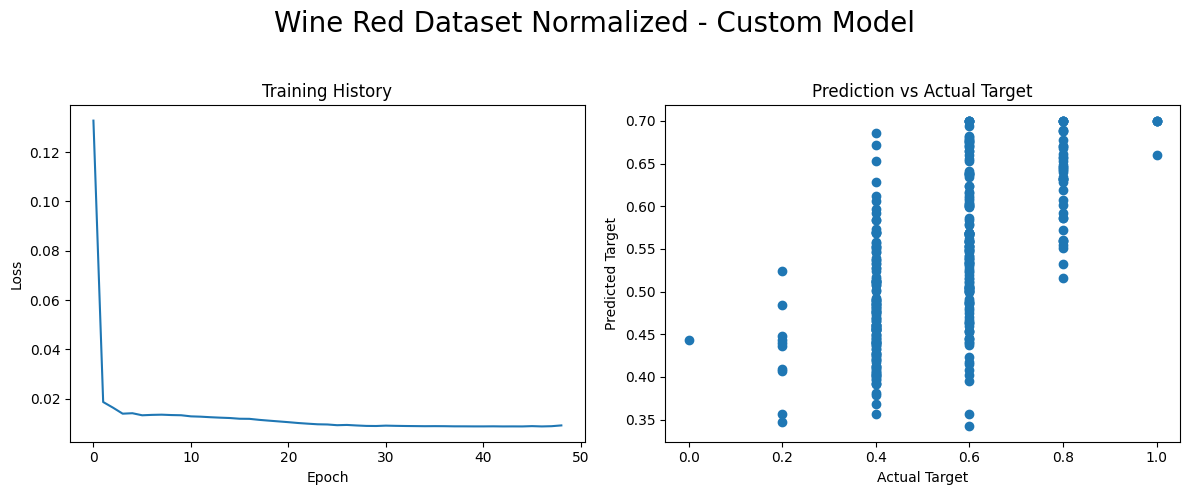

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.605702,0.566673,0.752777,0.434841


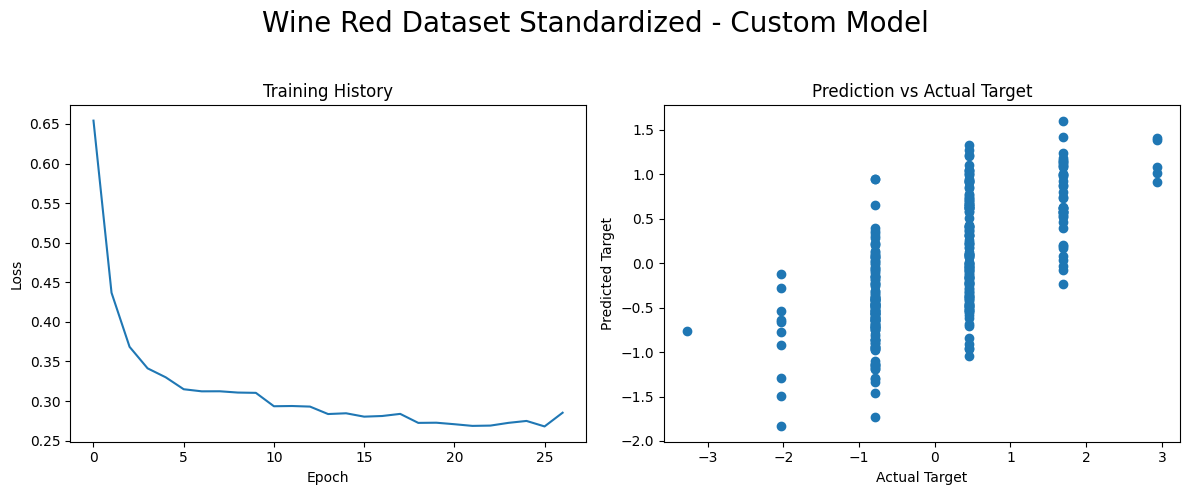

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.09901,0.015981,0.126415,0.257167


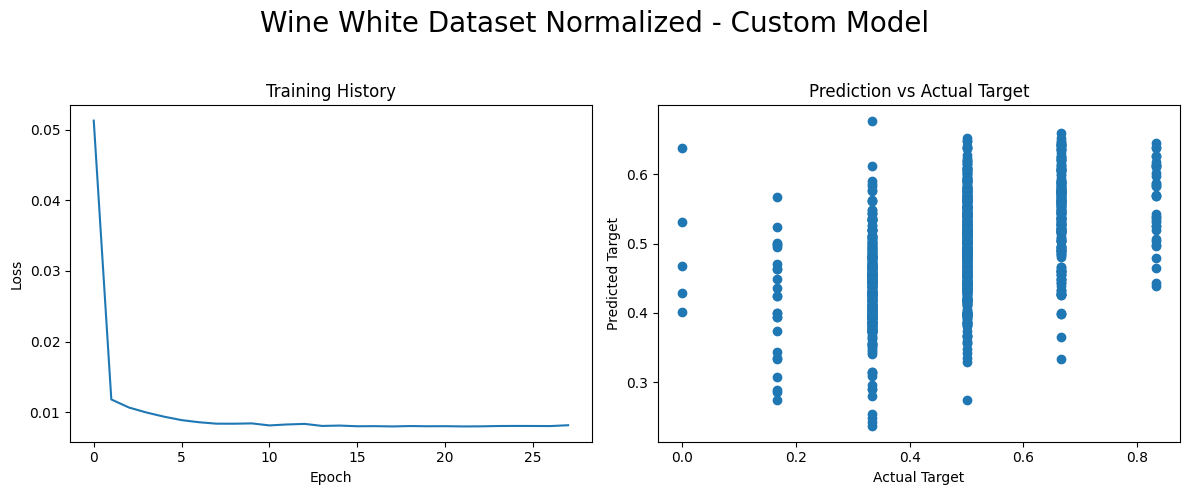

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.61738,0.63282,0.7955,0.359236


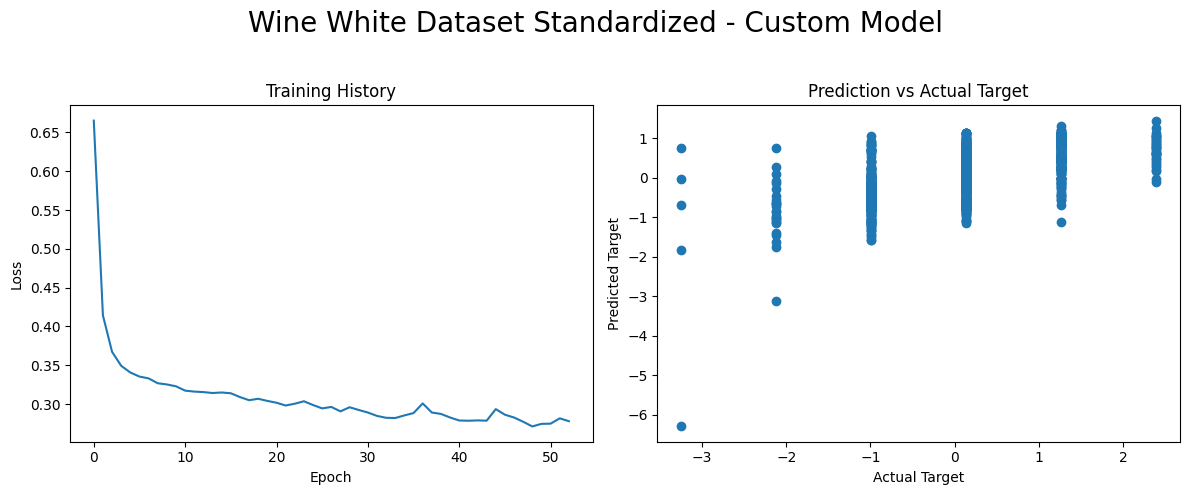

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.089213,0.015163,0.12314,0.704203


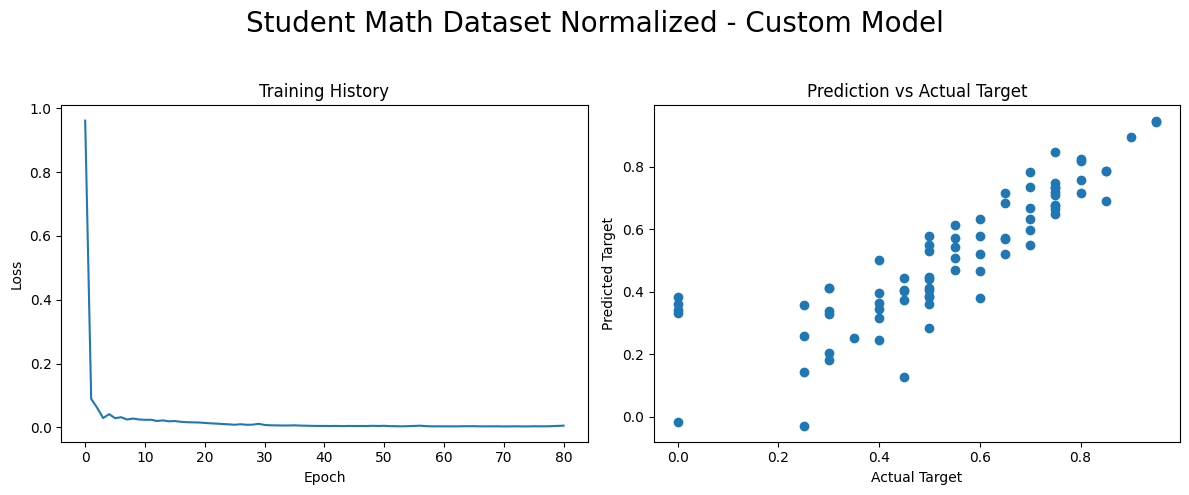

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.117043,0.028719,0.169467,0.439768


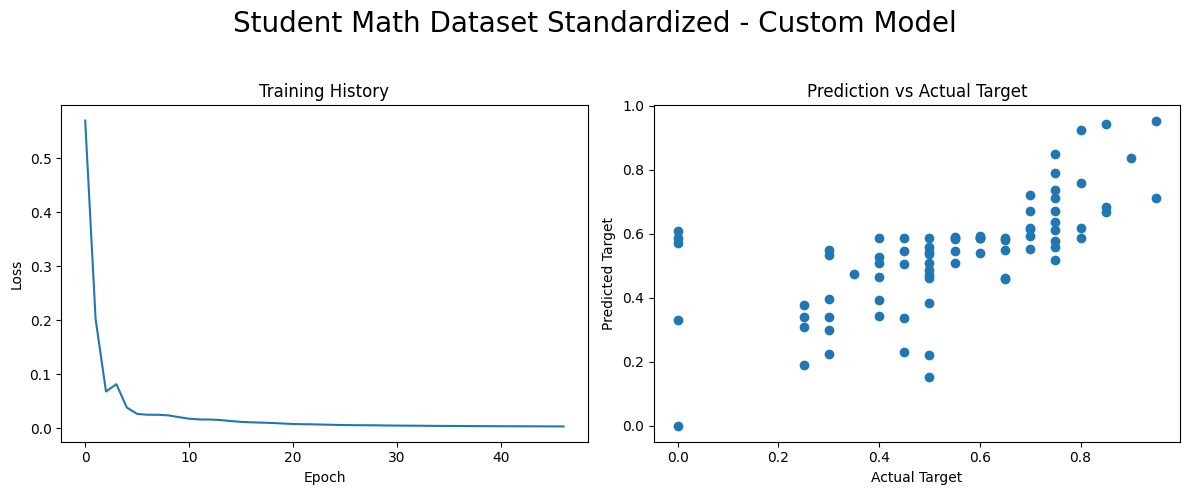

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.05416,0.006201,0.078749,0.770428


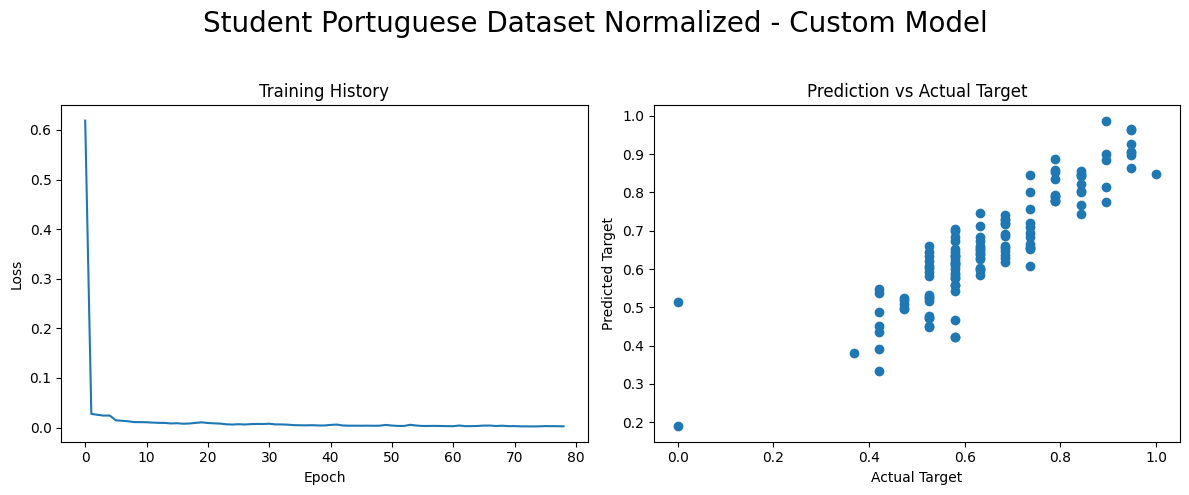

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.302932,0.221695,0.470845,0.763088


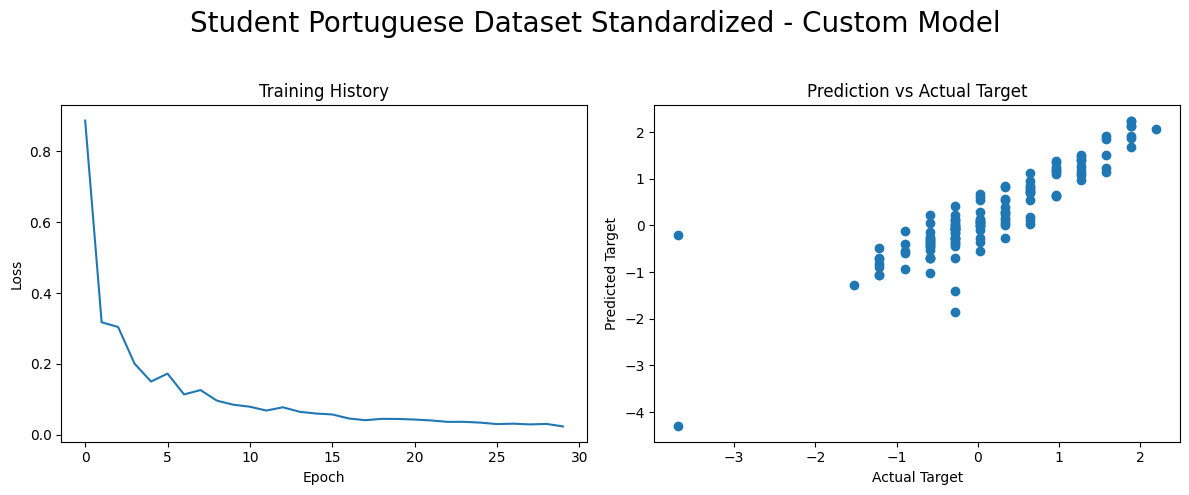

In [6]:
# Step 4.2 Train and Evaluate the model with custom model
# For Red Wine Dataset
train_and_evaluate(wineModel, wineRed_x_train_norm, wineRed_y_train_norm, wineRed_x_test_norm, wineRed_y_test_norm, 'Wine Red Dataset Normalized - Custom Model')  # Evaluate the model
train_and_evaluate(wineModel, wineRed_x_train_std, wineRed_y_train_std, wineRed_x_test_std, wineRed_y_test_std, 'Wine Red Dataset Standardized - Custom Model')  # Evaluate the model

# For White Wine Dataset
train_and_evaluate(wineModel, wineWhite_x_train_norm, wineWhite_y_train_norm, wineWhite_x_test_norm, wineWhite_y_test_norm, 'Wine White Dataset Normalized - Custom Model')  # Evaluate the model
train_and_evaluate(wineModel, wineWhite_x_train_std, wineWhite_y_train_std, wineWhite_x_test_std, wineWhite_y_test_std, 'Wine White Dataset Standardized - Custom Model')  # Evaluate the model

# For Student Math Dataset
train_and_evaluate(stdModel, stdMath_x_train_norm, stdMath_y_train_norm, stdMath_x_test_norm, stdMath_y_test_norm, 'Student Math Dataset Normalized - Custom Model')  # Evaluate the model
train_and_evaluate(stdModel, stdMath_x_train_std, stdMath_y_train_std, stdMath_x_test_std, stdMath_y_test_std, 'Student Math Dataset Standardized - Custom Model')  # Evaluate the model

# For Student Portuguese Dataset
train_and_evaluate(stdModel, stdPor_x_train_norm, stdPor_y_train_norm, stdPor_x_test_norm, stdPor_y_test_norm, 'Student Portuguese Dataset Normalized - Custom Model')  # Evaluate the model
train_and_evaluate(stdModel, stdPor_x_train_std, stdPor_y_train_std, stdPor_x_test_std, stdPor_y_test_std, 'Student Portuguese Dataset Standardized - Custom Model')  # Evaluate the model

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.103766,0.016195,0.127259,0.380458


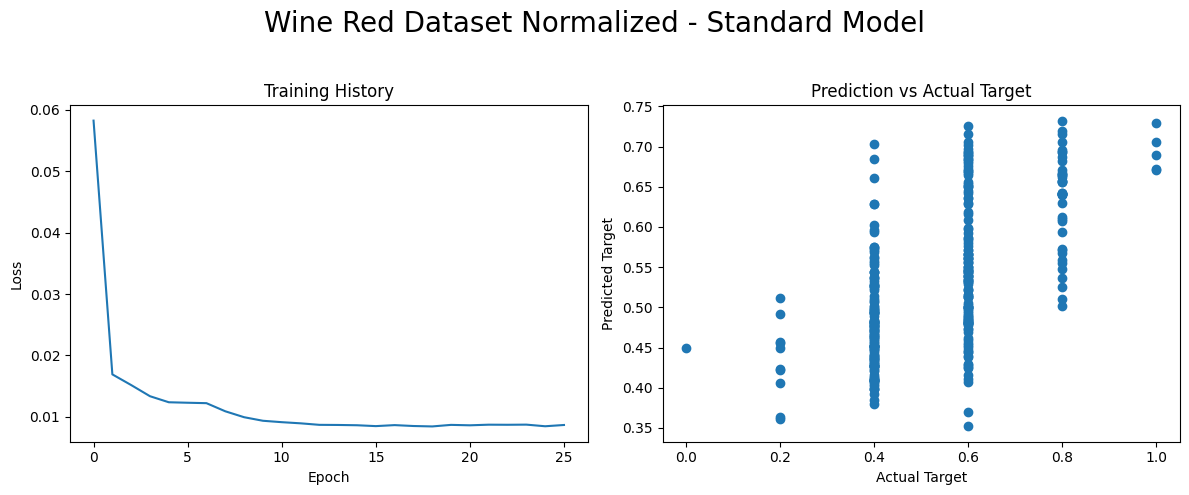

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.629563,0.58587,0.765421,0.415695


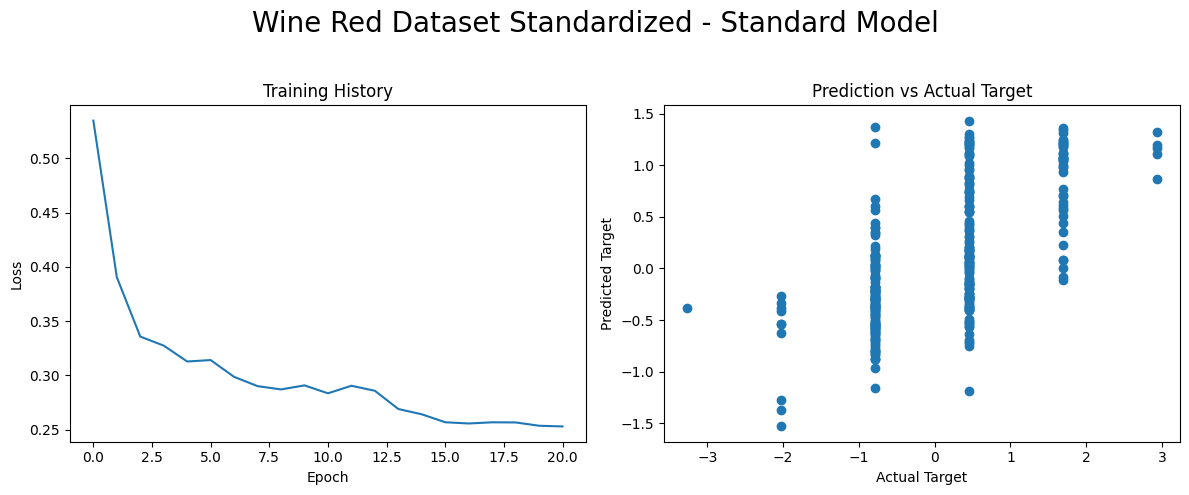

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.096281,0.014605,0.120849,0.321133


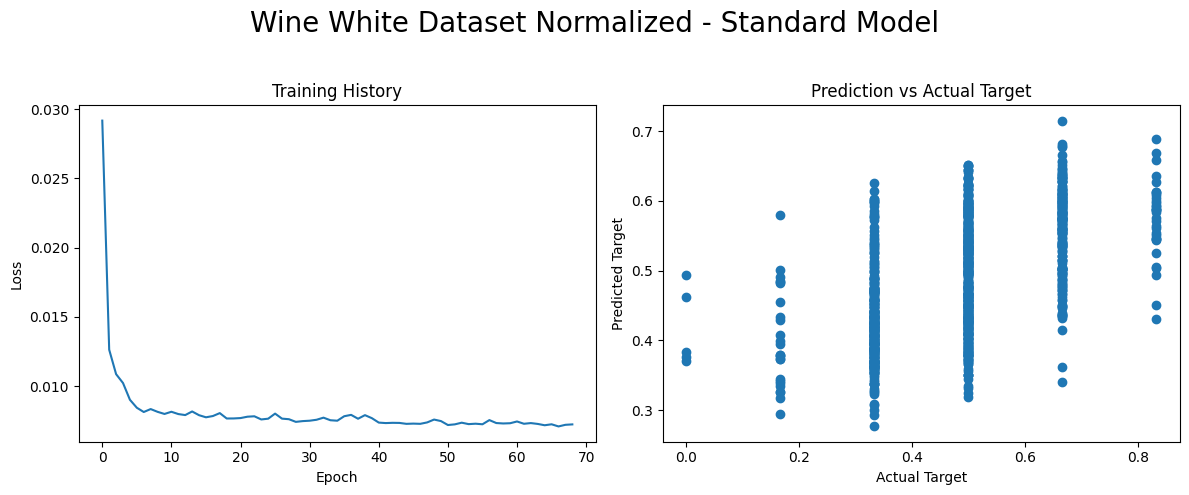

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.638448,0.655763,0.809792,0.336005


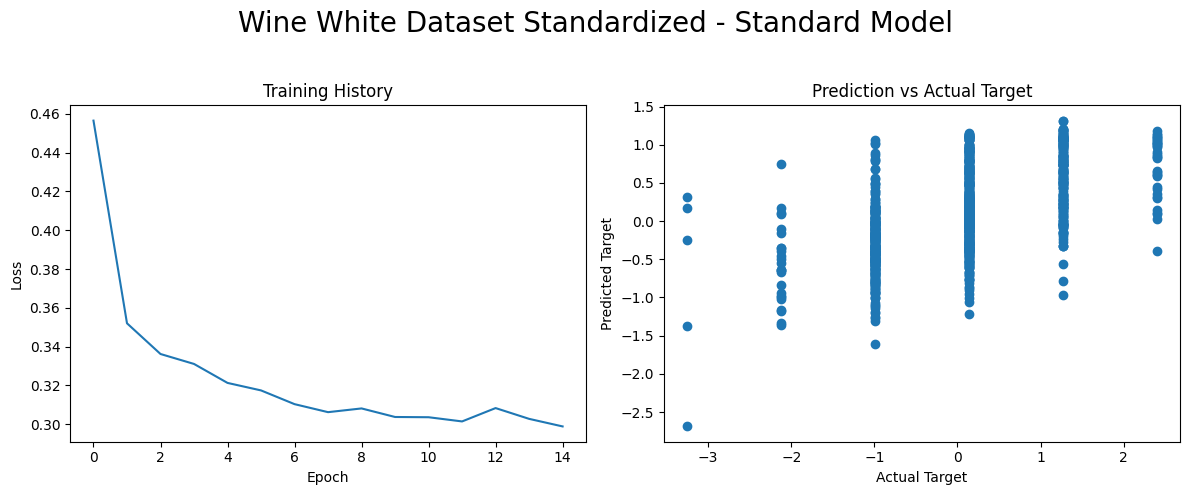

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.087886,0.014586,0.120771,0.715473


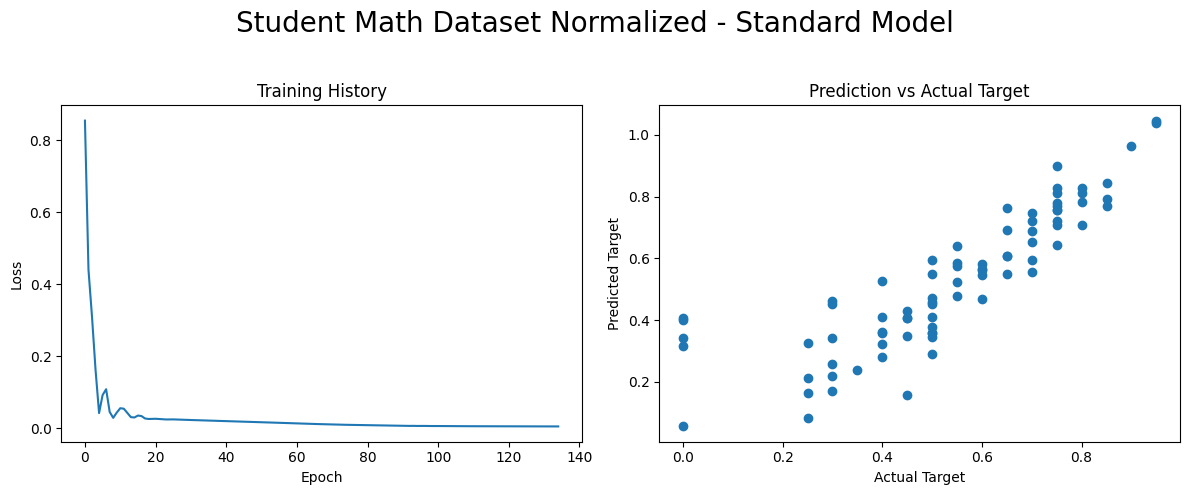

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.106194,0.019297,0.138912,0.623572


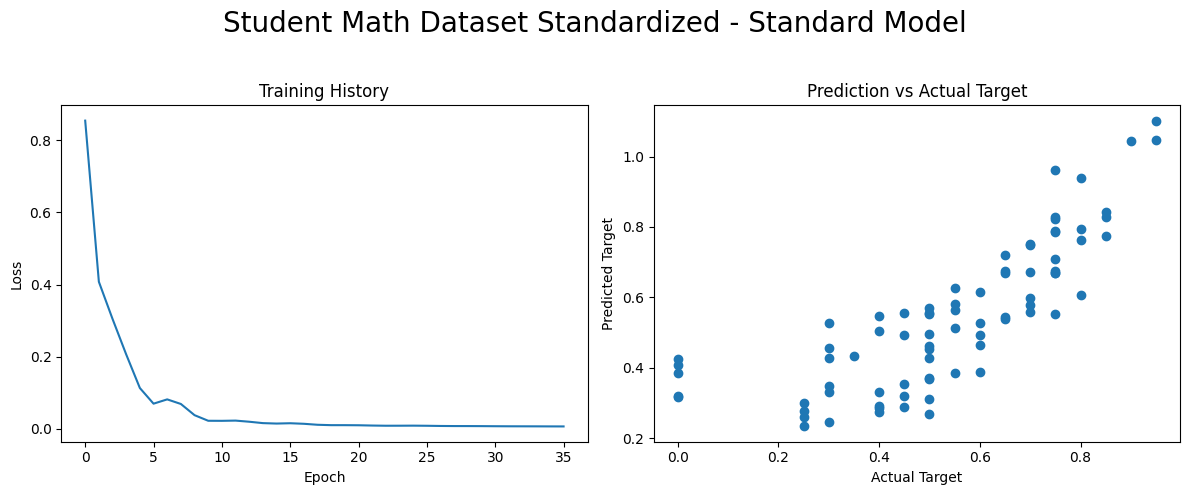

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.047337,0.005485,0.074059,0.79696


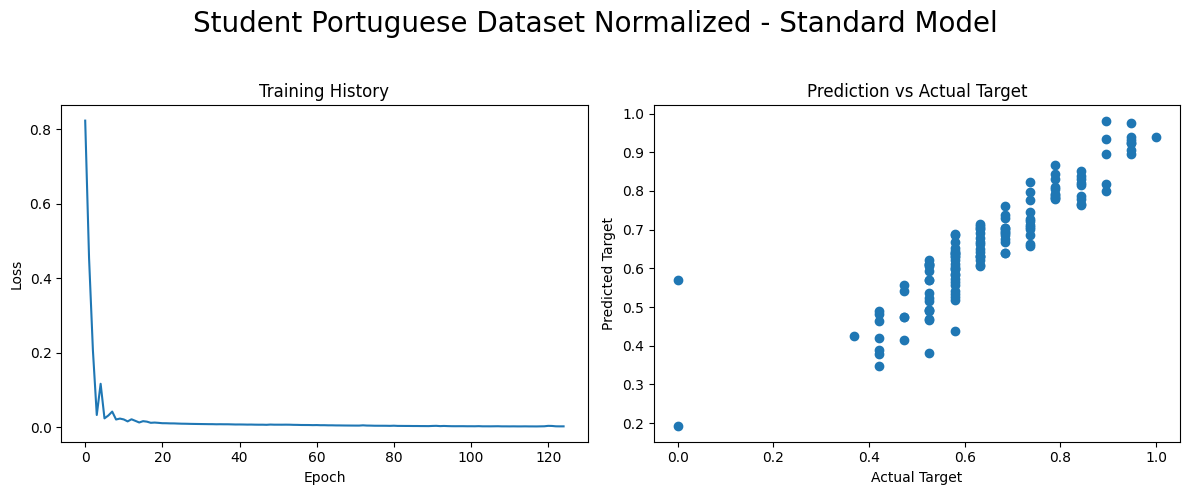

Wine Red Dataset Standardized


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.301799,0.20923,0.457416,0.776409


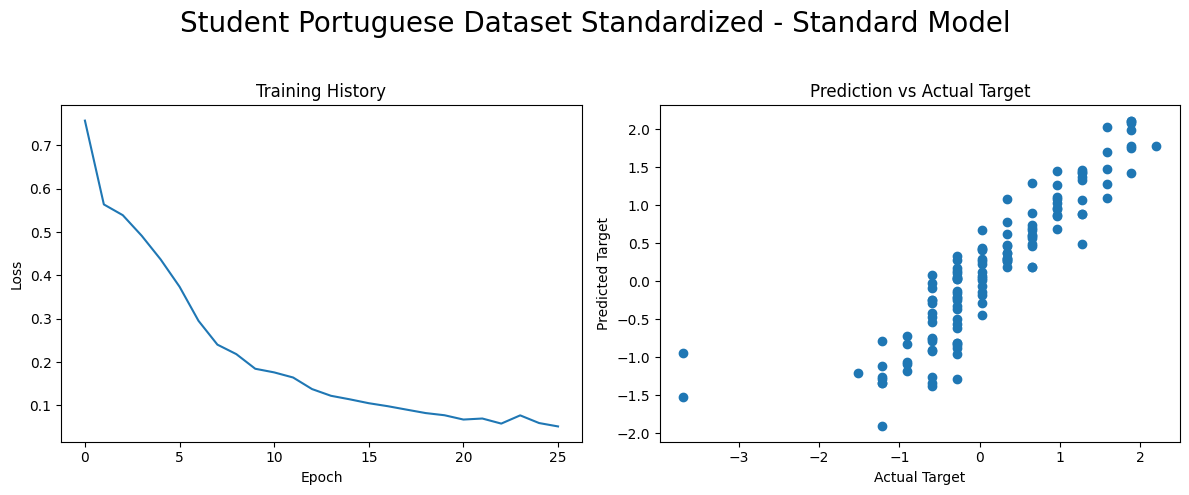

In [7]:
# Step 4.3 Train and Evaluate the model with standard model
train_and_evaluate(model, wineRed_x_train_norm, wineRed_y_train_norm, wineRed_x_test_norm, wineRed_y_test_norm, 'Wine Red Dataset Normalized - Standard Model')  # Evaluate the model
train_and_evaluate(model, wineRed_x_train_std, wineRed_y_train_std, wineRed_x_test_std, wineRed_y_test_std, 'Wine Red Dataset Standardized - Standard Model')  # Evaluate the model

# For White Wine Dataset
train_and_evaluate(model, wineWhite_x_train_norm, wineWhite_y_train_norm, wineWhite_x_test_norm, wineWhite_y_test_norm, 'Wine White Dataset Normalized - Standard Model')  # Evaluate the model
train_and_evaluate(model, wineWhite_x_train_std, wineWhite_y_train_std, wineWhite_x_test_std, wineWhite_y_test_std, 'Wine White Dataset Standardized - Standard Model')  # Evaluate the model

# For Student Math Dataset
train_and_evaluate(model, stdMath_x_train_norm, stdMath_y_train_norm, stdMath_x_test_norm, stdMath_y_test_norm, 'Student Math Dataset Normalized - Standard Model')  # Evaluate the model
train_and_evaluate(model, stdMath_x_train_std, stdMath_y_train_std, stdMath_x_test_std, stdMath_y_test_std, 'Student Math Dataset Standardized - Standard Model')  # Evaluate the model

# For Student Portuguese Dataset
train_and_evaluate(model, stdPor_x_train_norm, stdPor_y_train_norm, stdPor_x_test_norm, stdPor_y_test_norm, 'Student Portuguese Dataset Normalized - Standard Model')  # Evaluate the model
train_and_evaluate(model, stdPor_x_train_std, stdPor_y_train_std, stdPor_x_test_std, stdPor_y_test_std, 'Student Portuguese Dataset Standardized - Standard Model')  # Evaluate the model